In [14]:
from IPython.display import FileLink
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_addons as tfa
from tensorflow.keras import layers, losses, optimizers, Model, Sequential, activations, models
from volumentations import *
from dataloader import prepare_dataset
from models import *
from utils import plot_slices

In [2]:
TFRecord_filenames = [
    "./tfrecords/tsdc_abus_0.tfrec",
    "./tfrecords/tsdc_abus_1.tfrec",
    "./tfrecords/tsdc_abus_2.tfrec",
    "./tfrecords/tsdc_abus_3.tfrec",
    "./tfrecords/tsdc_abus_4.tfrec",
]


train_args = {
    "learning_rate": 4e-4,
    "len_data": 80,
    "batch_size": 2,
    "epochs": 20,
    "warmup_epoch_percentage": 0.1,
}
swin_args = {
    "input_shape": (64, 64, 64, 1),
    "embed_dim": 48,
    "window_size": [7, 7, 7],
    "patch_size": [4, 4, 4],
    "mask_ratio": 0.01,
    "depths": [2, 2, 2, 2],
    "mlp_ratio": 4.0,
    "num_heads": [3, 6, 12, 24],
    "patch_norm": True,
    "qkv_bias": True,
    "drop_path": 0.5,
    "attn_drop": 0.0,
    "proj_drop": 0.0,
}

In [3]:
vl_ds = prepare_dataset(
    TFRecord_filenames[-1], batch_size=1, patch_size=swin_args["input_shape"][:-1]
)


2023-07-29 03:12:14.661245: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13623 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:60:00.0, compute capability: 7.5
2023-07-29 03:12:14.663521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13623 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5
2023-07-29 03:12:14.665572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 13623 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:86:00.0, compute capability: 7.5
2023-07-29 03:12:14.667532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 13623 MB memory:  -> device: 3, name: Tesla T4, pci bus id: 0000:da:00.0, compute capability: 7.5
2023-07-

In [15]:
swin_args = {
    "input_shape": (64, 64, 64, 1),
    "embed_dim": 48,
    "window_size": [7, 7, 7],
    "patch_size": [4, 4, 4],
    "mask_ratio": 0.01,
    "depths": [2, 2, 2, 2],
    "mlp_ratio": 4.0,
    "num_heads": [3, 6, 12, 24],
    "patch_norm": True,
    "qkv_bias": True,
    "drop_path": 0.5,
    "attn_drop": 0.0,
    "proj_drop": 0.0,
}

xnet = get_XNet(**swin_args)
xnet.load_weights("/home/user/abus/fold1_xnet_w7_p4_e48.keras")



In [ ]:
# model.save("./temp.keras")
model = None
model = keras.models.load_model("/home/user/abus/fold1_xnet_w7_p4_e48.keras")


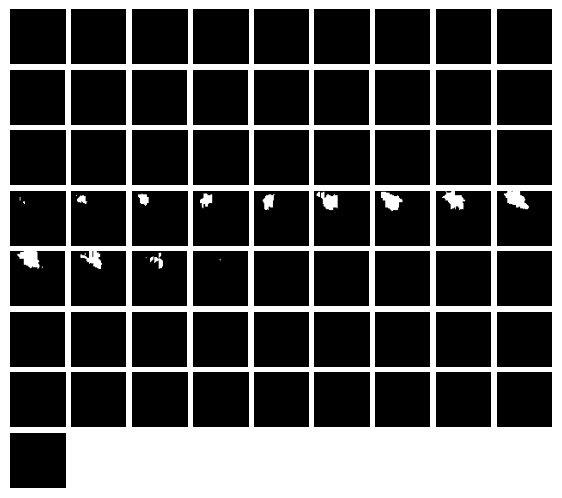

In [40]:
for x,y in vl_ds:
    inp = np.copy(x)
    plot_slices(y[0,:,:,:,0],figsize=7)
    break

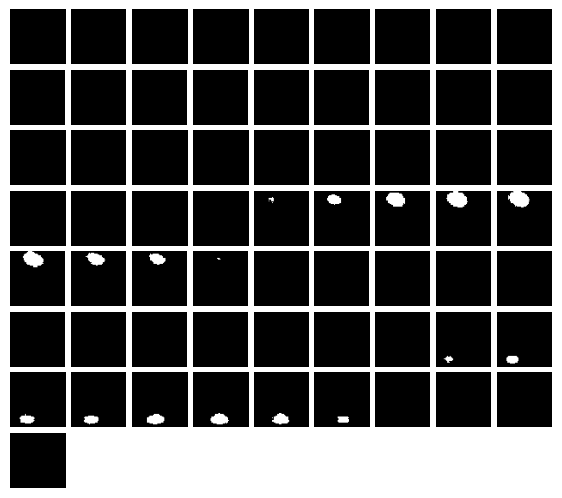

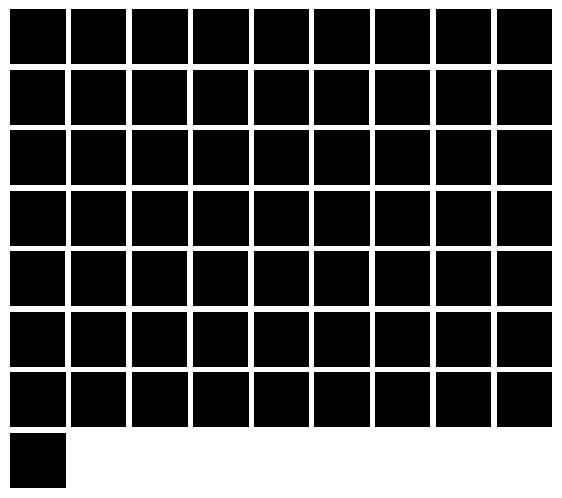

In [51]:
pred = model(inp)
# plot_slices(tf.nn.sigmoid(pred[0][0,:,:,:,0]),figsize=10)
plot_slices(pred[1][0,:,:,:,0]>.5,figsize=7)
plot_slices(tf.nn.sigmoid(pred[0][0,:,:,:,0])>.5,figsize=7)

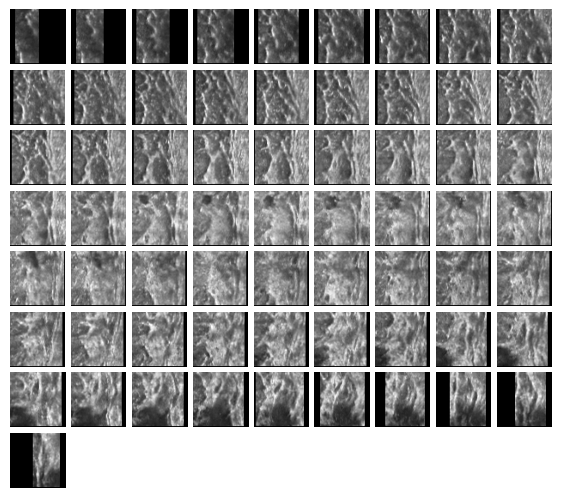

In [43]:
plot_slices(inp[0,:,:,:,0],figsize=7)
